# Entendimento do Negócio

Analisar as variáveis que possuem maior relevância para o processo de churn de clientes com o objetivo de diminuir essa taxa de evasão.

# Entendimento dos Dados

In [80]:
# bibliotecas
import pandas as pd
import numpy as np
from utils import *

pd.set_option('display.max_columns', None)

In [81]:
# carregando os dados
data_root = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

# verificando a quantidade de linhas e colunas
print(f'Formato do arquivo: {data_root.shape[0]} linhas e {data_root.shape[1]} colunas')

# verificando as primeiras linhas
data_root.head()

Formato do arquivo: 7267 linhas e 6 colunas


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


Existem algumas colunas que possuem dados no formato de JSON e irei seguir algumas etapas para lidar com isso:
- Análise de cada uma dessas colunas para verificar o conteúdo das mesmas;
- Criação de uma função para realizar a extração de forma automática;
- Extração dos dados dessas colunas transformando-os em novas colunas com o nome de sua chave.

In [82]:
# verificando os valores da coluna 'customer'
data_root.customer.loc[0]

{'gender': 'Female',
 'SeniorCitizen': 0,
 'Partner': 'Yes',
 'Dependents': 'Yes',
 'tenure': 9}

In [83]:
# verificando os valores da coluna 'phone'
data_root.phone.loc[0]

{'PhoneService': 'Yes', 'MultipleLines': 'No'}

In [84]:
# verificando os valores da coluna 'internet'
data_root.internet.loc[0]

{'InternetService': 'DSL',
 'OnlineSecurity': 'No',
 'OnlineBackup': 'Yes',
 'DeviceProtection': 'No',
 'TechSupport': 'Yes',
 'StreamingTV': 'Yes',
 'StreamingMovies': 'No'}

In [85]:
# verificando os valores da coluna 'account'
data_root.account.loc[0]

{'Contract': 'One year',
 'PaperlessBilling': 'Yes',
 'PaymentMethod': 'Mailed check',
 'Charges': {'Monthly': 65.6, 'Total': '593.3'}}

No primeiro conjunto de dados carregados, existem 6 colunas. São elas:
- **customerID:** é o id único de cada cliente;
- **Churn:** indica se o cliente deixou de ser cliente da empresa ou não;
- **customer:** contém informações específicas do cliente que se subdividem em:
    - **Dependents:** se possui dependentes;
    - **Partner:** se possui parceiro;
    - **SeniorCitizen:** se é idoso ou não;
    - **gender:** o sexo;
    - **tenure:** há quanto tempo (meses?) ele é cliente.
- **phone:** contém informações de serviços telefonicos do cliente:
    - **MultipleLines:** se possui multiplas linhas telefônicas;
    - **PhoneService:** se possui serviço telefônico;
- **internet:** contém informações de serviços de internet do cliente:
    - **DeviceProtection:** se possui serviço de proteção do dispostivo;
    - **InternetService:** se possui serviço de internet e qual;
    - **OnlineBackup:** se possui backup online;
    - **OnlineSecurity:** se possui segurança online;
    - **StreamingMovies:** se possui serviço de streaming de filmes;
    - **StreamingTV:** se possui serviço de streaming de TV;
    - **TechSupport:** se possui suporte técnico.
- **account:** possui informações da conta do cliente:
    - **Charges:** possui informações dos encargos:
        - **Monthly:** encargos mensais;
        - **Total:** encargos totais.
    - **Contract:** informações sobre o tempo de contrato;
    - **PaperlessBilling:** se possui recebimento de conta em papel;
    - **PaymentMethod:** informações sobre o métodos de pagamento.


In [86]:
# aplicando a função para a extração dos dados das colunas
# fazendo backup do conjunto de dados original
data = extract_dict(data_root)

# verificando a quantidade de linhas e colunas
print(f'Formato do arquivo: {data.shape[0]} linhas e {data.shape[1]} colunas')

# verificando as primeiras linhas
data.head()

Formato do arquivo: 7267 linhas e 21 colunas


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Irei traduzir o nome das colunas para português e deixá-lo de uma maneira mais fácil de manipular.

In [87]:
# nome de todas as colunas
data.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Monthly', 'Total'],
      dtype='object')

In [88]:
# traduzindo o nome das colunas
names = {
    'customerID': 'id',                         # categórica discreta
    'Churn': 'churn',                           # categórica nominal
    'gender': 'genero',                         # categórica nominal
    'SeniorCitizen': 'idoso',                   # categórica nominal
    'Partner': 'parceiro',                      # categórica nominal
    'Dependents': 'dependente',                 # categórica nominal
    'tenure': 'permanencia',                    # numérica continua
    'PhoneService': 'servico_telefonico',       # categórica nominal
    'MultipleLines': 'multiplas_linhas',        # categórica nominal
    'InternetService': 'servico_internet',      # categórica nominal
    'OnlineSecurity': 'seguranca_online',       # categórica nominal
    'OnlineBackup': 'backup_online',            # categórica nominal
    'DeviceProtection': 'protecao_dispositivo', # categórica nominal
    'TechSupport': 'suporte_tecnico',           # categórica nominal
    'StreamingTV': 'tv_streaming',              # categórica nominal
    'StreamingMovies': 'filme_streaming',       # categórica nominal
    'Contract': 'contrato',                     # categórica nominal
    'PaperlessBilling': 'conta_papel',          # categórica nominal
    'PaymentMethod': 'metodo_pagamento',        # categórica nominal
    'Monthly': 'mensal',                        # numérica continua
    'Total': 'total'                            # numérica continua
}

# renomeando o nome das colunas
data.rename(columns = names, inplace = True)

## Exploratory Data Analysis (EDA)

In [89]:
# verificando algumas informações básicas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    7267 non-null   object 
 1   churn                 7267 non-null   object 
 2   genero                7267 non-null   object 
 3   idoso                 7267 non-null   int64  
 4   parceiro              7267 non-null   object 
 5   dependente            7267 non-null   object 
 6   permanencia           7267 non-null   int64  
 7   servico_telefonico    7267 non-null   object 
 8   multiplas_linhas      7267 non-null   object 
 9   servico_internet      7267 non-null   object 
 10  seguranca_online      7267 non-null   object 
 11  backup_online         7267 non-null   object 
 12  protecao_dispositivo  7267 non-null   object 
 13  suporte_tecnico       7267 non-null   object 
 14  tv_streaming          7267 non-null   object 
 15  filme_streaming      

É possível notar que algumas colunas estão em formatos que não condizem com o tipo de dado que contém. Será feito uma análise um pouco mais profunda para entender melhor o que está acontecendo.

Primeiro irei analisar se as colunas possuem valores nulos.

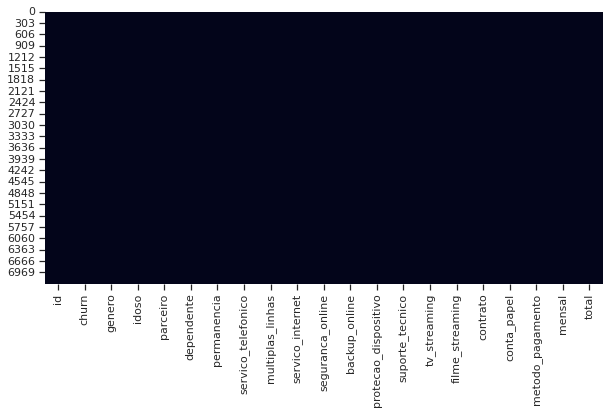

In [90]:
# plotando gráfico para visualizar valores nulos
plt.figure(figsize = (10, 5))

sns.heatmap(data.isna(), cbar = False)

plt.show()

Aparentemente, o conjunto de dados não possui nenhum dado nulo, porém, será necessário análisá-lo de forma mais profunda para realmente ter essa certeza.

Para explorar cada coluna e saber de forma detalhada o que essa coluna possui, quais são os tipos de dados que estão armazenados nelas, os valores que possum e qual a sua cardinalidade, no caso de dados categóricos, será criada uma função para fazer isso de forma automatizada.

In [91]:
# análise detalhada de cada coluna
columns_descriptions = []

for column in data.columns:
    column_description = column_analysis(data, column)
    columns_descriptions.append(column_description)

pd.DataFrame(columns_descriptions, columns = ['nome', 'cardinalidade', 'dados_unicos', 'dados_nulos', 'tipo'])

,nome,cardinalidade,dados_unicos,dados_nulos,tipo
0,id,7267,['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9...,0,object
1,churn,3,['No' 'Yes' ''],0,object
2,genero,2,['Female' 'Male'],0,object
3,idoso,2,[0 1],0,int64
4,parceiro,2,['Yes' 'No'],0,object
5,dependente,2,['Yes' 'No'],0,object
6,permanencia,73,[ 9 4 13 3 71 63 7 65 54 72 5 56 34 1 45 ...,0,int64
7,servico_telefonico,2,['Yes' 'No'],0,object
8,multiplas_linhas,3,['No' 'Yes' 'No phone service'],0,object
9,servico_internet,3,['DSL' 'Fiber optic' 'No'],0,object


Abaixo, estão listados o que é necessário realizar em cada coluna para que ela entre na conformidade.
- **id**: ✓
- **churn**: possui valores vazios ('')
- **genero**: ✓
- **idoso**: transformar [0 1] em ['No' 'Yes']
- **parceiro**: ✓
- **dependente**: ✓
- **permanencia**: ✓
- **servico_telefonico**: ✓
- **multipĺas_linhas**: transformar para dados categóricos*
- **servico_internet**: transformar para dados categóricos*
- **seguranca_online**: transformar para dados categóricos*
- **backup_online**: transformar para dados categóricos*
- **protecao_dispositivo**: transformar para dados categóricos
- **suporte_tecnico**: transformar para dados categóricos*
- **tv_streaming**: transformar para dados categóricos*
- **filme_streaming**: transformar para dados categóricos*
- **contrato**: transformar para dados categóricos*
- **conta_papel**: ✓
- **metodo_pagamento**: transformar para dados categóricos*
- **mensal**: ✓
- **total**: transformar para float64

### Colunas

#### Coluna **'churn'**

Será tratado os dados nulos da coluna 'churn', para que essas células fiquem rastreáveis como 'nan'.

In [93]:
# transformando valores '' para 'nan'
data.churn.replace({'': np.nan}, inplace = True)

Usando a função 'value_counts()' não é possível observar os valores nulos. Para verificar quantos valores nulos existem, irei utilizar a função 'groupby' com o parâmetro 'dropna = False'.

In [94]:
data.groupby(['churn'], dropna = False).size()

churn
No     5174
Yes    1869
NaN     224
dtype: int64

É possível observar que existem 224 dados com valores nulos nessa coluna. Como essa coluna é nossa coluna target, não é possível tomar outra atitude senão descartar os dados que possuem esses valores nulos, porém, serão utilizados posteriormente como forma de validação do modelo.

#### Coluna **'idoso'**

In [95]:
# transformando valores binários para 'No' e 'Yes'
data.idoso.replace({0: 'No', 1: 'Yes'}, inplace = True)

#### Coluna 'total'

Pela primeira análise, foi possível observar que a coluna 'total' está no formato 'object', porém, é necessário que ela fique no formato 'float'. Para isso, será utilizado a função 'pd.to_numeric(coluna)' para transformar os dados em numéricos.

In [96]:
# passando os valores da coluna de 'object' para 'float'
# após rodar a primeira vez a função pd.to_numeric(coluna) foi observado um erro, para contorná-lo,
# utilizou-se o parâmetro "errors = 'coerce'" para preencher as linhas que deram erro como 'nan'
data.total = pd.to_numeric(data.total) ### "errors = 'coerce'"

ValueError: Unable to parse string " " at position 975

In [ ]:
# analise descritiva da coluna 'total'
data.total.describe()

Existe uma frequência de 11 vezes de um valor vazio. Então será necessário analisar melhor para entender o porque disso.

In [ ]:
# verificando se existem valores vazios do tipo ''
data[data.total == '']

In [ ]:
# verificando se existem valores vazios do tipo ' '
data[data.total == ' ']

In [ ]:
# cerificando o tamanho do conjunto de dados que possui permanencia
print(f'{data[(data.total == " ") & (data.permanencia == 0)].shape[0]}' + ' linhas.')

Analisando os valores das outras colunas quando a coluna 'total' possui os valores vazios, é possível observar que o tempo de permanência dessas linhas possui o valor 0. Isso indica que a pessoa acabou de entrar na base de dados, então, não possui um valor total ainda. Sendo assim, será preenchido os valores dessas colunas com o valor da coluna 'mensal', indicando o valor total de gasto daquela pessoa até o momento. Mas primeiro, será necessário trocar os valores vazios para 'nan'.

In [ ]:
# preenchendo os valores vazios com 'nan'
data.total.replace({' ': np.nan}, inplace = True)

# preenchendo os valores da coluna 'total' com os da coluna 'mensal'
data.total.fillna(data.mensal, inplace = True)

In [ ]:
# checando o passo anterior
data[data.total.isna()]

Agora, veja se será possível colocá-la no formato 'float'.

In [ ]:
# transformando a coluna para numerica
data.total = pd.to_numeric(data.total)

In [ ]:
# verificando o passo anterior
data[data.permanencia == 0]

Será necessário realizar a última vez nas informações dos dados para verificar se tudo o que foi feito surtiu efeito.

In [ ]:
# verificando
data.info()

Com os dados limpos, agora é preciso separar os dados que contém a variável target nula, pois neste momento, não serão utilizados.

In [ ]:
# data[~data.churn.isna()].to_csv('/home/usuario/Pessoal/alura_challenge_ds/dados/data_cleaned.csv')

In [ ]:
# data[data.churn.isna()].to_csv('/home/usuario/Pessoal/alura_challenge_ds/dados/data_cleaned_validation.csv')